In [1]:
import numpy as np
import trimesh
import sys
from typing import List 
from IPython.display import clear_output, SVG
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    Concatenate,
    DiagramBuilder,
    MeshcatVisualizer,
    MeshcatVisualizerParams,
    Parser,
    PointCloud,
    RigidTransform,
    StartMeshcat,
    UniformlyRandomRotationMatrix,
    Context,
    Diagram,
    PointCloud,
    Simulator,
    TrajectorySource,
    Solve,
    RotationMatrix,
    MultibodyPlant
)
from pydrake.geometry import Meshcat
from pydrake.multibody import inverse_kinematics

from manipulation.station import MakeHardwareStation, load_scenario
from manipulation.meshcat_utils import AddMeshcatTriad
from manipulation import running_as_notebook
from manipulation.scenarios import AddFloatingRpyJoint, AddRgbdSensors, ycb, AddMultibodyTriad, MakeManipulationStation
from manipulation.utils import ConfigureParser
from manipulation.clutter import GraspCandidateCost, GenerateAntipodalGraspCandidate
from manipulation.icp import IterativeClosestPoint
from manipulation.station import AddPointClouds

# Own utils
from hwstation.add_objects import get_library_scenario_data, get_library_scenario_data_without_robot
from enum import Enum

from hwstation.utils import visualize_diagram, init_diagram, fix_input_port   

In [2]:
# Start meshcat
try:
    meshcat = Meshcat(7007)
except:
    pass #This error appears if this cell is executed twice (port 7006 is already taken then)

scenario_data = get_library_scenario_data()
diagram, visualizer, simulator = init_diagram(meshcat, scenario_data)
fix_input_port(diagram, simulator)

INFO:drake:Meshcat listening for connections at http://localhost:7007


In [3]:
simulator.AdvanceTo(1.0)

udp_read_packet -- select:: Interrupted system call


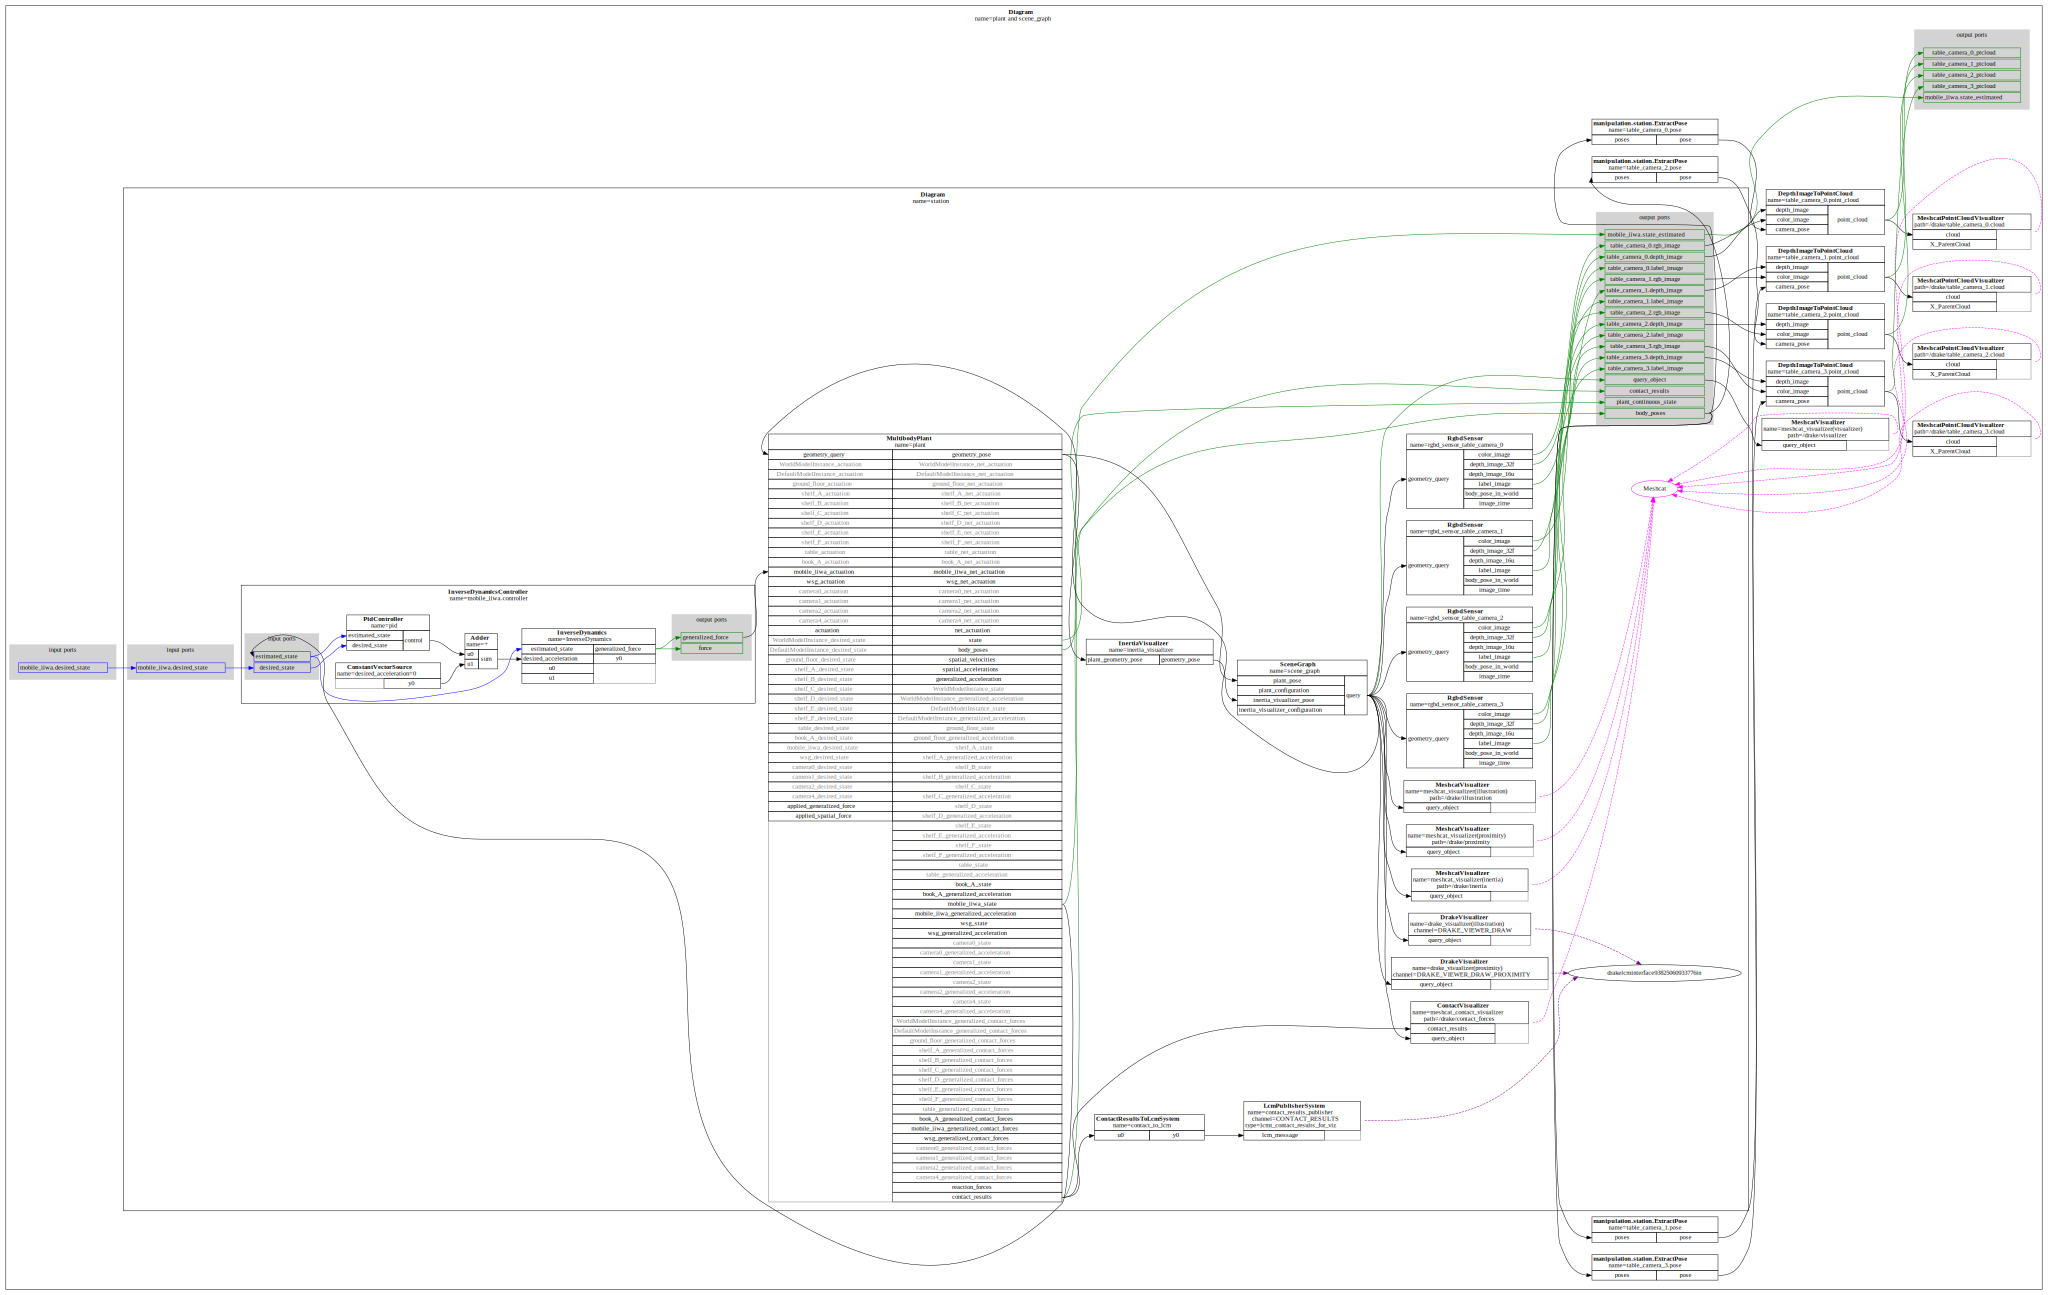

In [4]:
visualize_diagram(diagram)